In [1]:
using Pkg; Pkg.activate("../");
using LatticeLab
Pkg.activate("../../BandStructures");
using BandStructures
using LinearAlgebra
using PyPlot

In [2]:
a1 = [1,   0        ]
a2 = [1/2, sqrt(3)/2]
α = sqrt(3)
Atr = [a1, a2, a2.-a1, -a1, -a2, a1.-a2]
d1 = (α/3).*(Atr[1].+Atr[2])
d2 = (α/3).*(Atr[3].+Atr[4])
d3 = (α/3).*(Atr[5].+Atr[6])
delta = [d1,d2,d3]

3-element Vector{Vector{Float64}}:
 [0.8660254037844386, 0.49999999999999994]
 [-0.8660254037844386, 0.49999999999999994]
 [0.0, -0.9999999999999999]

In [3]:
BBOX(m,n) = ([-0.00021,-0.0001], # origin
             [1 0 ; 0 1],                 # supercell basis
             [m,n],                       # supercell shifts
             [true,true])                 # P.B.C. conditions

aa = hcat( α.*a1, α.*a2) |> LatticeLab.Coordinates
dd = hcat([0, 0], d1   ) |> LatticeLab.Coordinates
mm = [ :A,       :B      ] |> LatticeLab.Masses
xx = [[:pu,:pd],[:pu,:pd]] .|> LatticeLab.Orbits

UC_Honeycomb = LatticeLab.UnitCell( 2, 2, aa, dd, mm, xx )

nb1a(k) = Spring( (1,2) => [ delta[k],] )
nb1b(k) = Spring( (2,1) => [-delta[k],] )
nb2_cwise_s1  = Spring((1,1) => [α.*Atr[2], α.*Atr[4], α.*Atr[6]])
nb2_cwise_s2  = Spring((2,2) => [α.*Atr[2], α.*Atr[4], α.*Atr[6]])
nb2_ccwise_s1 = Spring((1,1) => [α.*Atr[1], α.*Atr[3], α.*Atr[5]])
nb2_ccwise_s2 = Spring((2,2) => [α.*Atr[1], α.*Atr[3], α.*Atr[5]])
NB_Haldane = [ nb1a(1), nb1a(2), nb1a(3), nb1b(1), nb1b(2), nb1b(3), 
               nb2_cwise_s1, nb2_cwise_s2, nb2_ccwise_s1, nb2_ccwise_s2 ]
SP_Haldane = [ :t1Ar,   :t1Ag,   :t1Ab,   :t1Br,   :t1Bg,   :t1Bb,
               :t2ps1,  :t2ps2,  :t2ms1,  :t2ms2  ]
LN_Haldane = LatticeLab.LinkInfo( 
    UC_Honeycomb, 
    LatticeLab.zict(SP_Haldane, NB_Haldane) )
@assert check_compat(LN_Haldane)

In [4]:
Honeycomb_Haldane = build_lattice(LN_Haldane, BBOX(3,3)) ;

┌ Info: build_lattice() : 
│ 		 margin = 1
└ @ LatticeLab /home/dabajabaza/jianguoyun/Nutstore/LatticeLab/src/lattice/build_lattice.jl:256
┌ Info: generate_R0_compute_EqV() : 
│ 		 bbox = ([-0.00021, -0.0001], [1 0; 0 1], [3, 3], Bool[1, 1])
│ 		 N_min, N_max = ([-2, -2], [5, 5])
└ @ LatticeLab /home/dabajabaza/jianguoyun/Nutstore/LatticeLab/src/lattice/build_lattice.jl:39
┌ Info: generate_R0_compute_EqV() : compute EqV ...
└ @ LatticeLab /home/dabajabaza/jianguoyun/Nutstore/LatticeLab/src/lattice/build_lattice.jl:53


  0.386456 seconds (1.26 M allocations: 73.712 MiB, 6.50% gc time, 99.04% compilation time)


┌ Info: generate_f() : main loop ...
└ @ LatticeLab /home/dabajabaza/jianguoyun/Nutstore/LatticeLab/src/lattice/build_lattice.jl:180


  0.667718 seconds (2.61 M allocations: 137.043 MiB, 4.16% gc time, 99.88% compilation time)


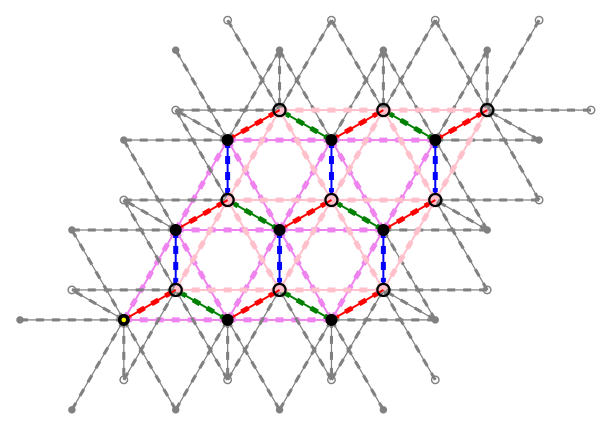

In [5]:
VSTYLE = Dict(
    :A=>("black",6.0,:dot),
    :B=>("black",6.0,:circle)
)
ESTYLE = Dict(
    :t1Ar => ("red",    2.0, :solid ),
    :t1Ag => ("green",  2.0, :solid ),
    :t1Ab => ("blue",   2.0, :solid ),
    :t1Br => ("red",    5.0, :dashed),
    :t1Bg => ("green",  5.0, :dashed),
    :t1Bb => ("blue",   5.0, :dashed),
    :t2ps1=> ("violet", 2.0, :solid ),
    :t2ps2=> ("pink",   2.0, :solid ),
    :t2ms1=> ("violet", 5.0, :dashed),
    :t2ms2=> ("pink",   5.0, :dashed),
)
display("image/svg+xml", 
    show_lattice_svg(Honeycomb_Haldane, VSTYLE, ESTYLE; upscale=60))

## debug Lattice.f : no problem

In [170]:
A,B,V = findnz(Honeycomb_Haldane.f) ;

In [186]:
V_ = findall(V.==:t2ps1) ;
A_ = Honeycomb_Haldane.R0[:, A[V_]] ;
B_ = Honeycomb_Haldane.R0[:, B[V_]] ;
[B_[:,i].-A_[:,i] for i=1:size(B_,2)] |> unique

16-element Vector{Vector{Float64}}:
 [-0.8660254037844386, -1.4999999999999998]
 [-0.8660254037844384, -1.4999999999999998]
 [-0.8660254037844386, 1.4999999999999998]
 [1.7320508075688772, 0.0]
 [-0.8660254037844388, 1.4999999999999998]
 [-0.8660254037844388, -1.4999999999999998]
 [-0.8660254037844393, 1.4999999999999998]
 [1.7320508075688776, 0.0]
 [-0.8660254037844384, 1.4999999999999998]
 [1.7320508075688774, 0.0]
 [1.7320508075688767, 0.0]
 [-0.8660254037844393, -1.4999999999999998]
 [-0.8660254037844388, -1.4999999999999996]
 [-0.8660254037844384, -1.4999999999999996]
 [-0.8660254037844384, 1.4999999999999996]
 [-0.8660254037844393, 1.4999999999999996]

In [187]:
V_ = findall(V.==:t2ps2) ;
A_ = Honeycomb_Haldane.R0[:, A[V_]] ;
B_ = Honeycomb_Haldane.R0[:, B[V_]] ;
[B_[:,i].-A_[:,i] for i=1:size(B_,2)] |> unique

16-element Vector{Vector{Float64}}:
 [-0.8660254037844386, -1.4999999999999998]
 [-0.8660254037844388, -1.4999999999999998]
 [-0.8660254037844384, -1.4999999999999998]
 [-0.8660254037844386, 1.4999999999999998]
 [1.7320508075688772, 0.0]
 [-0.8660254037844384, 1.4999999999999998]
 [1.7320508075688774, 0.0]
 [-0.8660254037844393, 1.4999999999999998]
 [1.7320508075688767, 0.0]
 [1.7320508075688776, 0.0]
 [-0.8660254037844388, 1.4999999999999998]
 [-0.8660254037844393, -1.4999999999999998]
 [-0.8660254037844384, -1.4999999999999996]
 [-0.8660254037844386, 1.4999999999999996]
 [-0.8660254037844384, 1.4999999999999996]
 [-0.8660254037844393, 1.4999999999999996]

In [188]:
V_ = findall(V.==:t2ms1) ;
A_ = Honeycomb_Haldane.R0[:, A[V_]] ;
B_ = Honeycomb_Haldane.R0[:, B[V_]] ;
[B_[:,i].-A_[:,i] for i=1:size(B_,2)] |> unique

16-element Vector{Vector{Float64}}:
 [0.8660254037844386, -1.4999999999999998]
 [0.8660254037844388, -1.4999999999999998]
 [0.8660254037844393, -1.4999999999999998]
 [-1.7320508075688772, 0.0]
 [0.8660254037844386, 1.4999999999999998]
 [0.8660254037844384, 1.4999999999999998]
 [-1.7320508075688776, 0.0]
 [0.8660254037844384, -1.4999999999999998]
 [-1.7320508075688774, 0.0]
 [0.8660254037844388, 1.4999999999999998]
 [-1.7320508075688767, 0.0]
 [0.8660254037844384, -1.4999999999999996]
 [0.8660254037844393, 1.4999999999999998]
 [0.8660254037844393, -1.4999999999999996]
 [0.8660254037844388, 1.4999999999999996]
 [0.8660254037844384, 1.4999999999999996]

In [189]:
V_ = findall(V.==:t2ms2) ;
A_ = Honeycomb_Haldane.R0[:, A[V_]] ;
B_ = Honeycomb_Haldane.R0[:, B[V_]] ;
[B_[:,i].-A_[:,i] for i=1:size(B_,2)] |> unique

16-element Vector{Vector{Float64}}:
 [0.8660254037844386, -1.4999999999999998]
 [0.8660254037844384, -1.4999999999999998]
 [0.8660254037844393, -1.4999999999999998]
 [-1.7320508075688772, 0.0]
 [0.8660254037844386, 1.4999999999999998]
 [-1.7320508075688774, 0.0]
 [0.8660254037844388, 1.4999999999999998]
 [-1.7320508075688767, 0.0]
 [0.8660254037844388, -1.4999999999999998]
 [0.8660254037844384, 1.4999999999999998]
 [-1.7320508075688776, 0.0]
 [0.8660254037844386, -1.4999999999999996]
 [0.8660254037844384, -1.4999999999999996]
 [0.8660254037844393, 1.4999999999999998]
 [0.8660254037844393, -1.4999999999999996]
 [0.8660254037844384, 1.4999999999999996]

In [7]:
hHaldane(0.1,0.2)

Dict{Symbol, Tuple{Symbol, Tuple{Number}}} with 10 entries:
  :t1Ag  => (:ALL, (1,))
  :t1Bg  => (:ALL, (1,))
  :t2ms2 => (:ALL, (0.0980067+0.0198669im,))
  :t1Ar  => (:ALL, (1,))
  :t1Bb  => (:ALL, (1,))
  :t1Ab  => (:ALL, (1,))
  :t1Br  => (:ALL, (1,))
  :t2ps1 => (:ALL, (0.0980067+0.0198669im,))
  :t2ms1 => (:ALL, (0.0980067-0.0198669im,))
  :t2ps2 => (:ALL, (0.0980067-0.0198669im,))

In [6]:
# the complicated way of assigning hopping parameters
func1() = (:ALL,(1,))
func(x) = (:ALL,(x,))
hHaldaneF  = Dict( :t1Ar=>func1, :t1Ag=>func1, :t1Ab=>func1,
                   :t1Br=>func1, :t1Bg=>func1, :t1Bb=>func1,
                   # the Haldanish lines
                   :t2ps1=>(x,y)->func(x*cis(y)),
                   :t2ps2=>(x,y)->func(x*cis(-y)),
                   :t2ms1=>(x,y)->func(x*cis(-y)),
                   :t2ms2=>(x,y)->func(x*cis(y)), )
hHaldaneP  = Dict( :t1Ar=>(), :t1Ag=>(), :t1Ab=>(),
                   :t1Br=>(), :t1Bg=>(), :t1Bb=>(),
                   :t2ps1=>(:tnn,:phi),:t2ms1=>(:tnn,:phi),
                   :t2ps2=>(:tnn,:phi),:t2ms2=>(:tnn,:phi), )
@inline hHaldane(tnn,phi) = LatticeLab.dispatch_params(
    Dict(:tnn=>tnn,:phi=>phi), 
    hHaldaneF, 
    hHaldaneP, 
    0.0
)

hHaldane (generic function with 1 method)

In [198]:
b = reciprocal_basis(Honeycomb_Haldane) ;
kpath = [ "Γ" => (0   ).*b[:,1],
          "M" => (1//2).*b[:,1] .+ (0//2).*b[:,2],
          "K" => (2//3).*b[:,1] .+ (1//3).*b[:,2],
          "Γ" => (0   ).*b[:,1], ] ;
HQs = [ kspace_hopping_hamiltonian( 
            HoppingParameter(Honeycomb_Haldane.UC, hHaldane(0.3,phi)), 
            zero_onsite_potential(Honeycomb_Haldane), 
            Honeycomb_Haldane )
        for phi = 0:0.1:0.4 ] ;
BSs = [ LatticeLab.band_structure(
            kpath, HQ, Δk=1e-3
            ) |> BandStructures.LatticeLab_bands_BandStructure
        for HQ in HQs ] ;

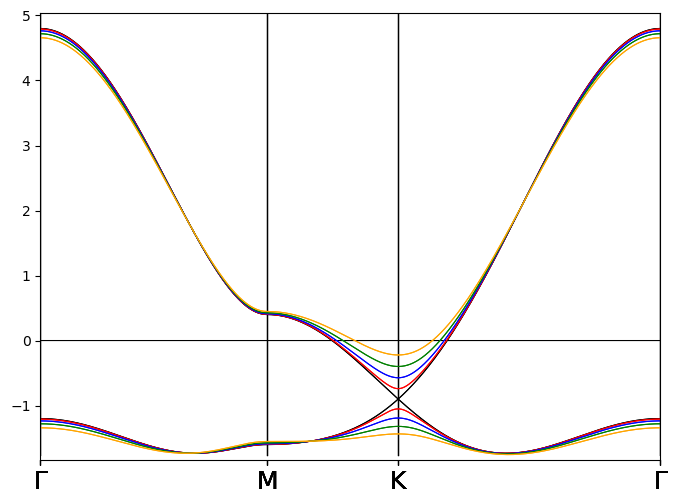

┌ Info: plot_bands()  : initializing ...
└ @ BandStructures /home/dabajabaza/jianguoyun/Nutstore/BandStructures/src/plot/plot_bands.jl:157
┌ Info: plot_bands!() : plotting frames ...
└ @ BandStructures /home/dabajabaza/jianguoyun/Nutstore/BandStructures/src/plot/plot_bands.jl:70
┌ Info: plot_bands!() : plotting lines ...
└ @ BandStructures /home/dabajabaza/jianguoyun/Nutstore/BandStructures/src/plot/plot_bands.jl:108
┌ Info: plot_bands!() : plotting auxilary levels ...
└ @ BandStructures /home/dabajabaza/jianguoyun/Nutstore/BandStructures/src/plot/plot_bands.jl:122
┌ Info: plot_bands!() : saving ...
└ @ BandStructures /home/dabajabaza/jianguoyun/Nutstore/BandStructures/src/plot/plot_bands.jl:138


In [234]:
plot_bands("Haldane_tnn=0.3.png", 
           BSs,
           dpi  = 1600,
           settings = Dict(
                :line_colors=>["black", "red", "blue", "green", "orange"],
                :lw=>0.8,
                :K_sep=>-1,
                :aspect_ratio=>0.6,
                :figure_size=>(8,10),)
)

In [200]:
using LinearAlgebra
K1 = (2//3).*b[:,1] .+ (1//3).*b[:,2]
K2 = (1//3).*b[:,1] .+ (2//3).*b[:,2]
function is_gapless(H,eps=1e-3)
    en1 = eigen(Matrix(HoppingHamiltonian(K1,H))).values
    en2 = eigen(Matrix(HoppingHamiltonian(K2,H))).values
    (  abs(maximum(en1)-minimum(en1))<eps 
    || abs(maximum(en2)-minimum(en2))<eps  )
end
Ham(t2,M,phi) = 
    kspace_hopping_hamiltonian( 
        HoppingParameter(Honeycomb_Haldane.UC, hHaldane(t2,phi)), 
        Dict(:A=>M,:B=>-M),
        Honeycomb_Haldane )

Ham (generic function with 1 method)

In [230]:
t2 = 0.3
@time Phase = [ is_gapless(Ham(t2,t2*r,phi),4e-2) 
                for r=-6:0.05:6, phi=-2pi:(pi/50):2pi ] ;

  8.839576 seconds (80.40 M allocations: 6.916 GiB, 8.97% gc time, 0.81% compilation time)


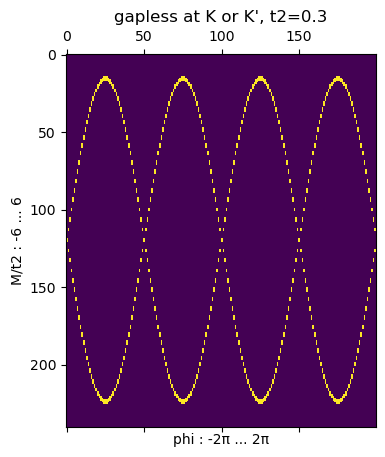

In [243]:
matshow(Phase)
xlabel("phi : -2π ... 2π")
ylabel("M/t2 : -6 ... 6")
title("gapless at K or K', t2=0.3")
savefig("Haldane_gapless.jpg")

In [203]:
BBOX_ENL(m,n) = BoundingBox(
    ([-0.00021,-0.0001],  # origin
     [[1,0] [-1,2]],      # supercell basis
     [m,n],               # supercell shifts
     [true,true])         # P.B.C. conditions
)
BBOX_stack_stripe_along_x(Len) = BoundingBox(
    ([-0.00021,-0.0001],  # origin
     [[1,0] [0,1]],       # supercell basis
     [Len,1],             # supercell shifts
     [true,false])        # P.B.C. conditions
)
LATT00_y_Honeycomb_ENL = build_lattice(LN_Haldane, BBOX_ENL(1,16)) ;
LATTy_open = enlarge(LATT00_y_Honeycomb_ENL, BBOX_stack_stripe_along_x(3)) ;

┌ Info: build_lattice() : 
│ 		 margin = 1
└ @ LatticeLab /home/dabajabaza/jianguoyun/Nutstore/LatticeLab/src/lattice/build_lattice.jl:256
┌ Info: generate_R0_compute_EqV() : 
│ 		 bbox = ([-0.00021, -0.0001], [1 -1; 0 2], [1, 16], Bool[1, 1])
│ 		 N_min, N_max = ([-18, -2], [3, 34])
└ @ LatticeLab /home/dabajabaza/jianguoyun/Nutstore/LatticeLab/src/lattice/build_lattice.jl:39
┌ Info: generate_R0_compute_EqV() : compute EqV ...
└ @ LatticeLab /home/dabajabaza/jianguoyun/Nutstore/LatticeLab/src/lattice/build_lattice.jl:53


  0.102997 seconds (847.69 k allocations: 53.589 MiB)
  0.002252 seconds (47.14 k allocations: 2.069 MiB)
  0.020331 seconds (312.49 k allocations: 21.708 MiB)
  0.010244 seconds (204.78 k allocations: 9.537 MiB)


┌ Info: generate_f() : main loop ...
└ @ LatticeLab /home/dabajabaza/jianguoyun/Nutstore/LatticeLab/src/lattice/build_lattice.jl:180
┌ Info: build_lattice() : 
│ 		 margin = 2
└ @ LatticeLab /home/dabajabaza/jianguoyun/Nutstore/LatticeLab/src/lattice/build_lattice.jl:256
┌ Info: generate_R0_compute_EqV() : 
│ 		 bbox = ([-0.00021, -0.0001], [1 0; 0 1], [3, 1], Bool[1, 0])
│ 		 N_min, N_max = ([-3, -3], [6, 4])
└ @ LatticeLab /home/dabajabaza/jianguoyun/Nutstore/LatticeLab/src/lattice/build_lattice.jl:39
┌ Info: generate_R0_compute_EqV() : compute EqV ...
└ @ LatticeLab /home/dabajabaza/jianguoyun/Nutstore/LatticeLab/src/lattice/build_lattice.jl:53
┌ Info: generate_f() : main loop ...
└ @ LatticeLab /home/dabajabaza/jianguoyun/Nutstore/LatticeLab/src/lattice/build_lattice.jl:180


## open y

In [204]:
b_y = reciprocal_basis(LATTy_open) ;
kpath_y = [ "Γ" => (0).*b_y[:,1],
            "Γ" => (1).*b_y[:,1], ] ;

In [206]:
#P_lower = diagm(0=>[[1,1,1,1,1,1,1,1]; [0 for i=1:96*2-8]])
#P_upper = diagm(0=>[[0 for i=1:96*2-8]; [1,1,1,1,1,1,1,1]])
#edge_state_projector = [(k,v)->max(abs(v'*P_lower*v)-0.06,0), (k,v)->max(abs(v'*P_upper*v)-0.06,0)]

In [219]:
HQy_open = [kspace_hopping_hamiltonian( 
                HoppingParameter(LATTy_open.UC, hHaldane(0.1,0.2)), 
                Dict(:A=>M,:B=>-M), 
                LATTy_open)
            for M = 0.06:0.02:0.14 ] ;
BSy_open = [LatticeLab.band_structure(
                kpath_y, HQ, Δk=2e-4
                ) |> BandStructures.LatticeLab_bands_BandStructure
            for HQ in HQy_open ] ;

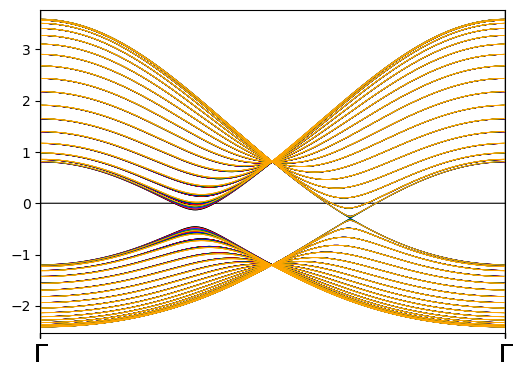

┌ Info: plot_bands()  : initializing ...
└ @ BandStructures /home/dabajabaza/jianguoyun/Nutstore/BandStructures/src/plot/plot_bands.jl:157
┌ Info: plot_bands!() : plotting frames ...
└ @ BandStructures /home/dabajabaza/jianguoyun/Nutstore/BandStructures/src/plot/plot_bands.jl:70
┌ Info: plot_bands!() : plotting lines ...
└ @ BandStructures /home/dabajabaza/jianguoyun/Nutstore/BandStructures/src/plot/plot_bands.jl:108
┌ Info: plot_bands!() : plotting auxilary levels ...
└ @ BandStructures /home/dabajabaza/jianguoyun/Nutstore/BandStructures/src/plot/plot_bands.jl:122
┌ Info: plot_bands!() : saving ...
└ @ BandStructures /home/dabajabaza/jianguoyun/Nutstore/BandStructures/src/plot/plot_bands.jl:138


In [247]:
plot_bands("Haldane_t2=0.1_phi=0.2_M=(0.06,0.02,0.14).png", 
           BSy_open,
           dpi   = 800,
           settings = Dict(
                :line_colors=>["black", "red", "blue", "green", "orange"],
                :K_sep=>-1,
                :lw=>0.5,
                :aspect_ratio=>0.4,
                :figure_size=>(6,10),)
)

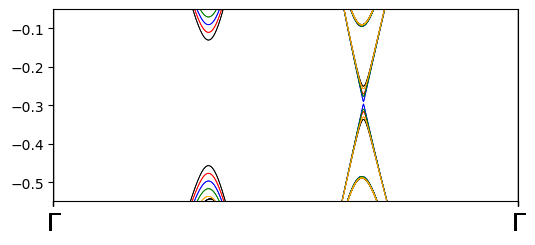

┌ Info: plot_bands()  : initializing ...
└ @ BandStructures /home/dabajabaza/jianguoyun/Nutstore/BandStructures/src/plot/plot_bands.jl:157
┌ Info: plot_bands!() : plotting frames ...
└ @ BandStructures /home/dabajabaza/jianguoyun/Nutstore/BandStructures/src/plot/plot_bands.jl:70
┌ Info: plot_bands!() : plotting lines ...
└ @ BandStructures /home/dabajabaza/jianguoyun/Nutstore/BandStructures/src/plot/plot_bands.jl:108
┌ Info: plot_bands!() : plotting auxilary levels ...
└ @ BandStructures /home/dabajabaza/jianguoyun/Nutstore/BandStructures/src/plot/plot_bands.jl:122
┌ Info: plot_bands!() : saving ...
└ @ BandStructures /home/dabajabaza/jianguoyun/Nutstore/BandStructures/src/plot/plot_bands.jl:138


In [249]:
plot_bands("Haldane_t2=0.1_phi=0.2_M=(0.06,0.02,0.14)__ZOOM.png", 
           BSy_open,
           dpi   = 800,
           settings = Dict(
                :line_colors=>["black", "red", "blue", "green", "orange"],
                :K_sep => -1,
                :range => (-0.55,-0.05),
                :lw    => 0.6,
                :aspect_ratio => 3,
                :figure_size  => (6,10),)
)

## open x : useless

In [160]:
LATTx_open = enlarge(LATT00_x_Honeycomb_ENL, BBOX_stack_stripe_along_y(3)) ;
#display("image/svg+xml", 
#    show_lattice_svg(LATTy_open, VSTYLE, ESTYLE; upscale=60))

  0.037043 seconds (266.13 k allocations: 18.236 MiB, 41.12% gc time)
  0.015980 seconds (325.14 k allocations: 15.086 MiB)


┌ Info: build_lattice() : 
│ 		 margin = 1
└ @ LatticeLab /home/dabajabaza/jianguoyun/Nutstore/LatticeLab/src/lattice/build_lattice.jl:256
┌ Info: generate_R0_compute_EqV() : 
│ 		 bbox = ([-0.00021, -0.0001], [1 0; 0 1], [1, 3], Bool[0, 1])
│ 		 N_min, N_max = ([-2, -2], [3, 5])
└ @ LatticeLab /home/dabajabaza/jianguoyun/Nutstore/LatticeLab/src/lattice/build_lattice.jl:39
┌ Info: generate_R0_compute_EqV() : compute EqV ...
└ @ LatticeLab /home/dabajabaza/jianguoyun/Nutstore/LatticeLab/src/lattice/build_lattice.jl:53
┌ Info: generate_f() : main loop ...
└ @ LatticeLab /home/dabajabaza/jianguoyun/Nutstore/LatticeLab/src/lattice/build_lattice.jl:180


Lattice{SparseArrays.SparseMatrixCSC{Symbol, Int64}, Float64}([-83.13843876330611 -82.27241335952168 … 164.54482671904336 165.41085212282778; -5.999999999999999 -5.499999999999999 … 16.999999999999996 16.499999999999996], ([-0.00021, -0.0001], [1 0; 0 1], [1, 3], Bool[0, 1]), LinkInfo(LatticeLab.UnitCell(2, 96, [41.569219381653056 0.0; 0.0 2.9999999999999996], [0.0 0.8660254037844386 … 39.83716857408418 40.703193977868615; 0.0 0.49999999999999994 … 1.9999999999999998 1.4999999999999998], Union{Number, Symbol}[:A, :B, :A, :B, :A, :B, :A, :B, :A, :B  …  :B, :A, :B, :A, :B, :A, :B, :A, :B, :A], [[:pu, :pd], [:pu, :pd], [:pu, :pd], [:pu, :pd], [:pu, :pd], [:pu, :pd], [:pu, :pd], [:pu, :pd], [:pu, :pd], [:pu, :pd]  …  [:pu, :pd], [:pu, :pd], [:pu, :pd], [:pu, :pd], [:pu, :pd], [:pu, :pd], [:pu, :pd], [:pu, :pd], [:pu, :pd], [:pu, :pd]]), Dict{Symbol, Dict{Tuple{Int64, Int64}, Vector{Vector{T} where T}}}(:t1Ag => Dict((84, 83) => [[-0.866025403784441, 0.5]], (11, 10) => [[-0.8660254037844384

In [161]:
b_x = reciprocal_basis(LATTx_open) ;
kpath_x = [ "Γ" => (0).*b_x[:,2],
            "Γ" => (1).*b_x[:,2], ] ;

In [164]:
HQx_open = kspace_hopping_hamiltonian( 
                HoppingParameter(LATTx_open.UC, hHaldane(0.3,0.1)), 
                Dict(:A=>0.157,:B=>-0.157), 
                LATTx_open
) ;

BSx_open = LatticeLab.band_structure(
    kpath_x, HQy_open, Δk=1e-3
) |> BandStructures.LatticeLab_bands_BandStructure ;

In [166]:
HQx_open.LATT.UC.δ

2×96 Matrix{Float64}:
 0.0  0.866025  1.73205  2.59808  …  38.1051  38.9711  39.8372  40.7032
 0.0  0.5       0.0      0.5          2.0      1.5      2.0      1.5

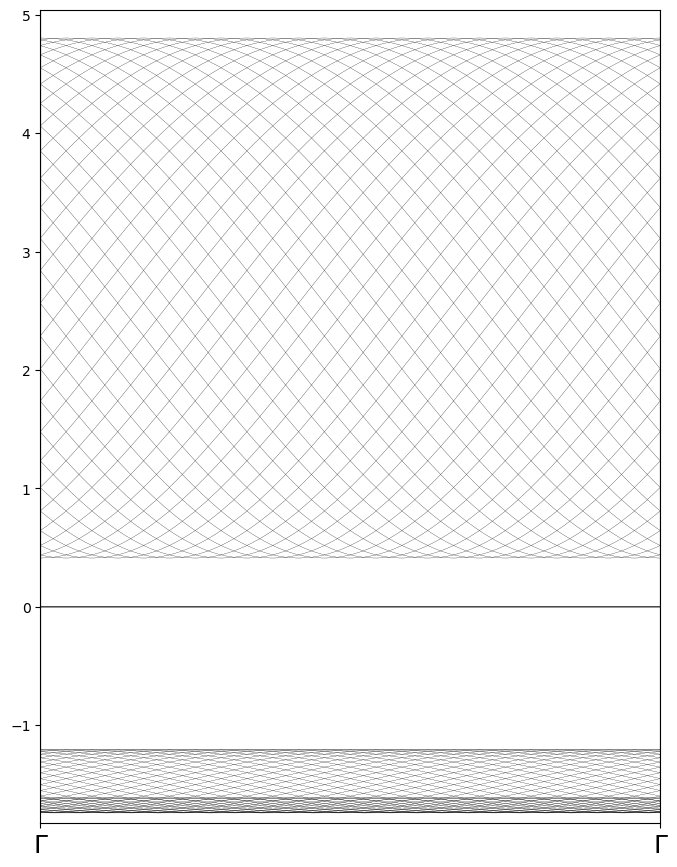

┌ Info: plot_bands()  : initializing ...
└ @ BandStructures /home/dabajabaza/jianguoyun/Nutstore/BandStructures/src/plot/plot_bands.jl:157
┌ Info: plot_bands!() : plotting frames ...
└ @ BandStructures /home/dabajabaza/jianguoyun/Nutstore/BandStructures/src/plot/plot_bands.jl:70
┌ Info: plot_bands!() : plotting lines ...
└ @ BandStructures /home/dabajabaza/jianguoyun/Nutstore/BandStructures/src/plot/plot_bands.jl:108
┌ Info: plot_bands!() : plotting auxilary levels ...
└ @ BandStructures /home/dabajabaza/jianguoyun/Nutstore/BandStructures/src/plot/plot_bands.jl:122
┌ Info: plot_bands!() : saving ...
└ @ BandStructures /home/dabajabaza/jianguoyun/Nutstore/BandStructures/src/plot/plot_bands.jl:138


In [165]:
plot_bands("x16.pdf", 
           [BSx_open,],
           #SIZE  = [400.0,  400.0 ],
           #COLOR = ["red", "blue"], 
           dpi   = 1600,
           settings = Dict(
                :line_colors=>["black"],
                :lw=>0.1,
                :aspect_ratio=>0.4,
                :figure_size=>(8,12),)
)